# The overall workflow in 'Breast_Cancer_ML_Performance_Report'
## 1. Data Preparation
## 2. Model Performance Report
## 3. Feature Importance Report - Assoication
## 4. Feature Dimension Reduction

# Packages

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Breast_Cancer_Functions import (final_preprocess, get_performance_metrics)
from Breast_Cancer_Functions import (feature_dimension_reduction, plot_roc_curve, best_hyperparameter)
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report

# 1. Data Preparation
- Use my customized function defined previously in Breast_Cancer_Functions.py to process on the dataset.

In [3]:
data = pd.read_csv('data.csv')
train_standardized_data, test_standardized_data, y_train, y_test, column_names = final_preprocess(data=data)

# 2. Model Performance Report
- After collecting 100 Bayesian Optimization searching results for the top two best candidates, Gradient Boosting Classifier and XGBoost, I can compare the best model performance between two models and determine which one solves the problem the best.

## 2.1 GradientBoostingClassifier
- Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. (Reference: https://en.wikipedia.org/wiki/Gradient_boosting)


- Sklearn API reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [4]:
# Get the hyperparameters of GradientBoostingClassifier which achieved the optimal model performance.
best_gb = best_hyperparameter(json_data='GB_clf.json')

In [5]:
# Fit hyperparameters on GradientBoostingClassifier.
best_gb_clf = GradientBoostingClassifier(**best_gb['hyperparameter'])

In [6]:
# Fit the training set on the best GradientBoostingClassifier.
best_gb_clf.fit(train_standardized_data, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5573223602679283, loss='deviance',
              max_depth=1.210178297036005,
              max_features=0.34622300182713517, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=340,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.9872776216269418, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 2.1.1 Confusion Matrix

- In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). (Reference: https://en.wikipedia.org/wiki/Confusion_matrix)


- The goal of this project is trying as much as possible for a machine learning algorithm to classify patients correctly in both positive and negative groups with a focus on predicting patients who do have breast cancer. Therefore, immediate and corresponding treatment can be taken for patients.


| - | **Predicted as Positive** | **Predicted as Negative** | 
| -- | -- | -- |
| **Ground Truth as Positive** | True Positive  | False Negative |
| **Ground Truth as Negative** | False Positive | True Negative | 

- Metric Explanations

    True Positive = A patient diagnosed as NOT having breast cancer and indeed doesn't have.

    False Negative = A patient diagnosed as having breast cancer but indeed doesn't have.

    False Positive = A patient diagnosed as NOT having breast cancer but indeed has breast cancer.

    True Negative = A patient diagnosed as having breast cancer and indeed has breast cancer.

In [7]:
# Make predictions on training and testing set.
gb_train_pred = best_gb_clf.predict(train_standardized_data)
gb_test_pred = best_gb_clf.predict(test_standardized_data)

In [8]:
test_df = pd.DataFrame(confusion_matrix(y_test, y_pred=gb_test_pred), 
                       columns=['Pred 0', 'Pred 1'],
                       index = ['True 0', 'True 1'])
test_df

,Pred 0,Pred 1
True 0,67,0
True 1,1,46


### 2.1.2 Classification Report
- **Precision**: Precision measures how accurately a machine learning model can classify the true positive instances among all **predicted positive instances**. The closer it's to 1, the better.
    
    - Formula: $\frac {TP} {TP + FP} $


- **Recall**: Recall tells how correctly a machine learning model can classify the true positive instances among all **positive instances** originally from a dataset. The closer it's to 1, the better. 
    
    - Formula: $\frac {TP} {TP + FN} $


- **F1-score**: F1-score balances the importance of between Precision and Recall. The closer it's to 1, the better.
    
    - Formula: $ {2} · \frac {Precision · Recall} {Precision + Recall} $
    

- **ROC curve**: An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification probability thresholds. This curve plots two parameters on an x-axis and y-axis: 
    
    - True Positive Rate: Same as Recall.
    - False Positive Rate: $\frac {FP} {FP + TN} $ 
    

- **AUC (Area Under the ROC Curve)**: AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). The closer to 1, the better.


- **Accuracy**: Accuracy shows mathematically, how many instances have been correctly classified by a model.
    
    - Formula: $\frac {TP + TN} {TP + FP + TN + FN}$


In [9]:
print(classification_report(y_true=y_test, 
                            y_pred=gb_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### 2.1.3 Visualization Report - ROC & AUC 

           train      test
metrics                   
AUC          1.0  0.989362
Accuracy     1.0  0.991228
Precision    1.0  1.000000
Recall       1.0  0.978723
f1-score     1.0  0.989247


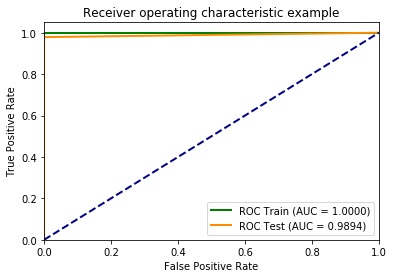

In [10]:
get_performance_metrics(y_train=y_train, 
                        y_train_pred=gb_train_pred, 
                        y_test=y_test, 
                        y_test_pred=gb_test_pred, 
                        threshold=0.5)

plot_roc_curve(y_train=y_train, 
                        y_train_pred=gb_train_pred, 
                        y_test=y_test, 
                        y_test_pred=gb_test_pred)

## 2.2 XGBClassifier
- Python API reference: https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [11]:
# Get the hyperparameters of GradientBoostingClassifier which achieved the optimal model performance.
best_xgb = best_hyperparameter(json_data='XGB_clf.json')

In [12]:
# Fit hyperparameters on GradientBoostingClassifier.
best_xgb_clf = xgb.XGBClassifier(**best_xgb['hyperparameter'])

In [13]:
# Fit the training set on the best GradientBoostingClassifier.
best_xgb_clf.fit(train_standardized_data, y_train)

XGBClassifier(alpha=0.5310509369764981, base_score=0.5, booster='gbtree',
       colsample_bylevel=0.9627189504712029,
       colsample_bynode=0.6716909747620067,
       colsample_bytree=0.39474897744146287, eta=0.33407025121475886,
       gamma=0, lambda=0.16477130536951384, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_round=81,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.4502403174502356, task='train', verbosity=1)

### 2.2.1 Confusion Matrix

In [14]:
# Make predictions on training and testing set.
xgb_train_pred = best_xgb_clf.predict(train_standardized_data)
xgb_test_pred = best_xgb_clf.predict(test_standardized_data)

In [15]:
test_df = pd.DataFrame(confusion_matrix(y_test, y_pred=xgb_test_pred), 
                       columns=['Pred 0', 'Pred 1'],
                       index = ['True 0', 'True 1'])
test_df

,Pred 0,Pred 1
True 0,65,2
True 1,1,46


### 2.2.2 Classification Report

In [16]:
print(classification_report(y_true=y_test, 
                            y_pred=xgb_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 2.2.3 Visualization Report - ROC & AUC 

              train      test
metrics                      
AUC        0.984848  0.974436
Accuracy   0.989011  0.973684
Precision  1.000000  0.958333
Recall     0.969697  0.978723
f1-score   0.984615  0.968421


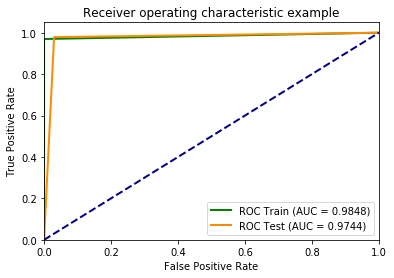

In [17]:
get_performance_metrics(y_train=y_train, 
                        y_train_pred=xgb_train_pred, 
                        y_test=y_test, 
                        y_test_pred=xgb_test_pred, 
                        threshold=0.5)

plot_roc_curve(y_train=y_train, 
                        y_train_pred=xgb_train_pred,
                        y_test=y_test, 
                        y_test_pred=xgb_test_pred)

## 2.3 Conclusion - Model Performance

- Overall groups

| Model | Accuracy score | AUC | 
| -- | -- | -- |
| **GradientBoostingClassifier** | **0.99**  | **0.9894** |
| XGBClassifier | 0.97 | 0.9744 | 


- benign group (on testing set)

| Model | Precision score | Recall score | F1-score
| -- | -- | -- | -- |
| **GradientBoostingClassifier** | **0.99**  | **1.0** | **0.99**
| XGBClassifier | 0.98 | 0.97 | 0.98

- malignant group (on testing set)
 
| Model | Precision score | Recall score | F1-score
| -- | -- | -- | -- |
| **GradientBoostingClassifier** | **1.0**  | **0.98** | **0.99**
| XGBClassifier | 0.96 | **0.98** | 0.97

- Each model has been equally optimized 100 times by using Bayesian Optimization. Based on the above model performance result, GradientBoostingClassifier is an ideal model to classify patients into groups since it can achieve the higher model performance compared with XGBClassifier.

# 3. Feature Importance Report - Assoication
- To further validate the model predictions, it's always better to look at the association (relationship) between features and the outcome variable.
- Previously, in 'Breast_Cancer_Feature_Selection', the top five most influential features selected using statistical hypothesis testing are: perimeter_mean, radius_worst, concave points_mean, perimeter_worst, and concave points_worst.


In [18]:
# Two predictors have 0 contribution on the response variable: 'perimeter_mean', and 'radius_mean'.
# However, the model tells that 'perimeter_mean' doens't play a significant role in predicting, 
# which is an opposite result compared with statistical hypothesis testing.

pd.DataFrame(best_gb_clf.feature_importances_[best_gb_clf.feature_importances_ == 0],
             index = column_names[best_gb_clf.feature_importances_ == 0],
             columns=['importance by Gradient Boosting Classifier'])

,importance by xgboost
perimeter_mean,0.0
radius_mean,0.0


In [19]:
feature_importances = pd.DataFrame(best_gb_clf.feature_importances_ * 100,
                                   index = column_names,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances['importance'] = round(feature_importances['importance'], 2)
feature_importances['cumulative_sum (%)'] = round(feature_importances.importance.cumsum(), 2)

- concave points_worst plays a significant role in predicting breast cancer instances since it accounts more than **60%** of total feature importance, followed by area_se (**17.21%**) and area_mean (**7.15%**).
- It's reasonable that concave points_worst can do such a great job in classifying groups since the higher the number of concave portions of the contour, the higher the probability of having breast cancer.

Text(0.5, 0, 'Feature Importance in %')

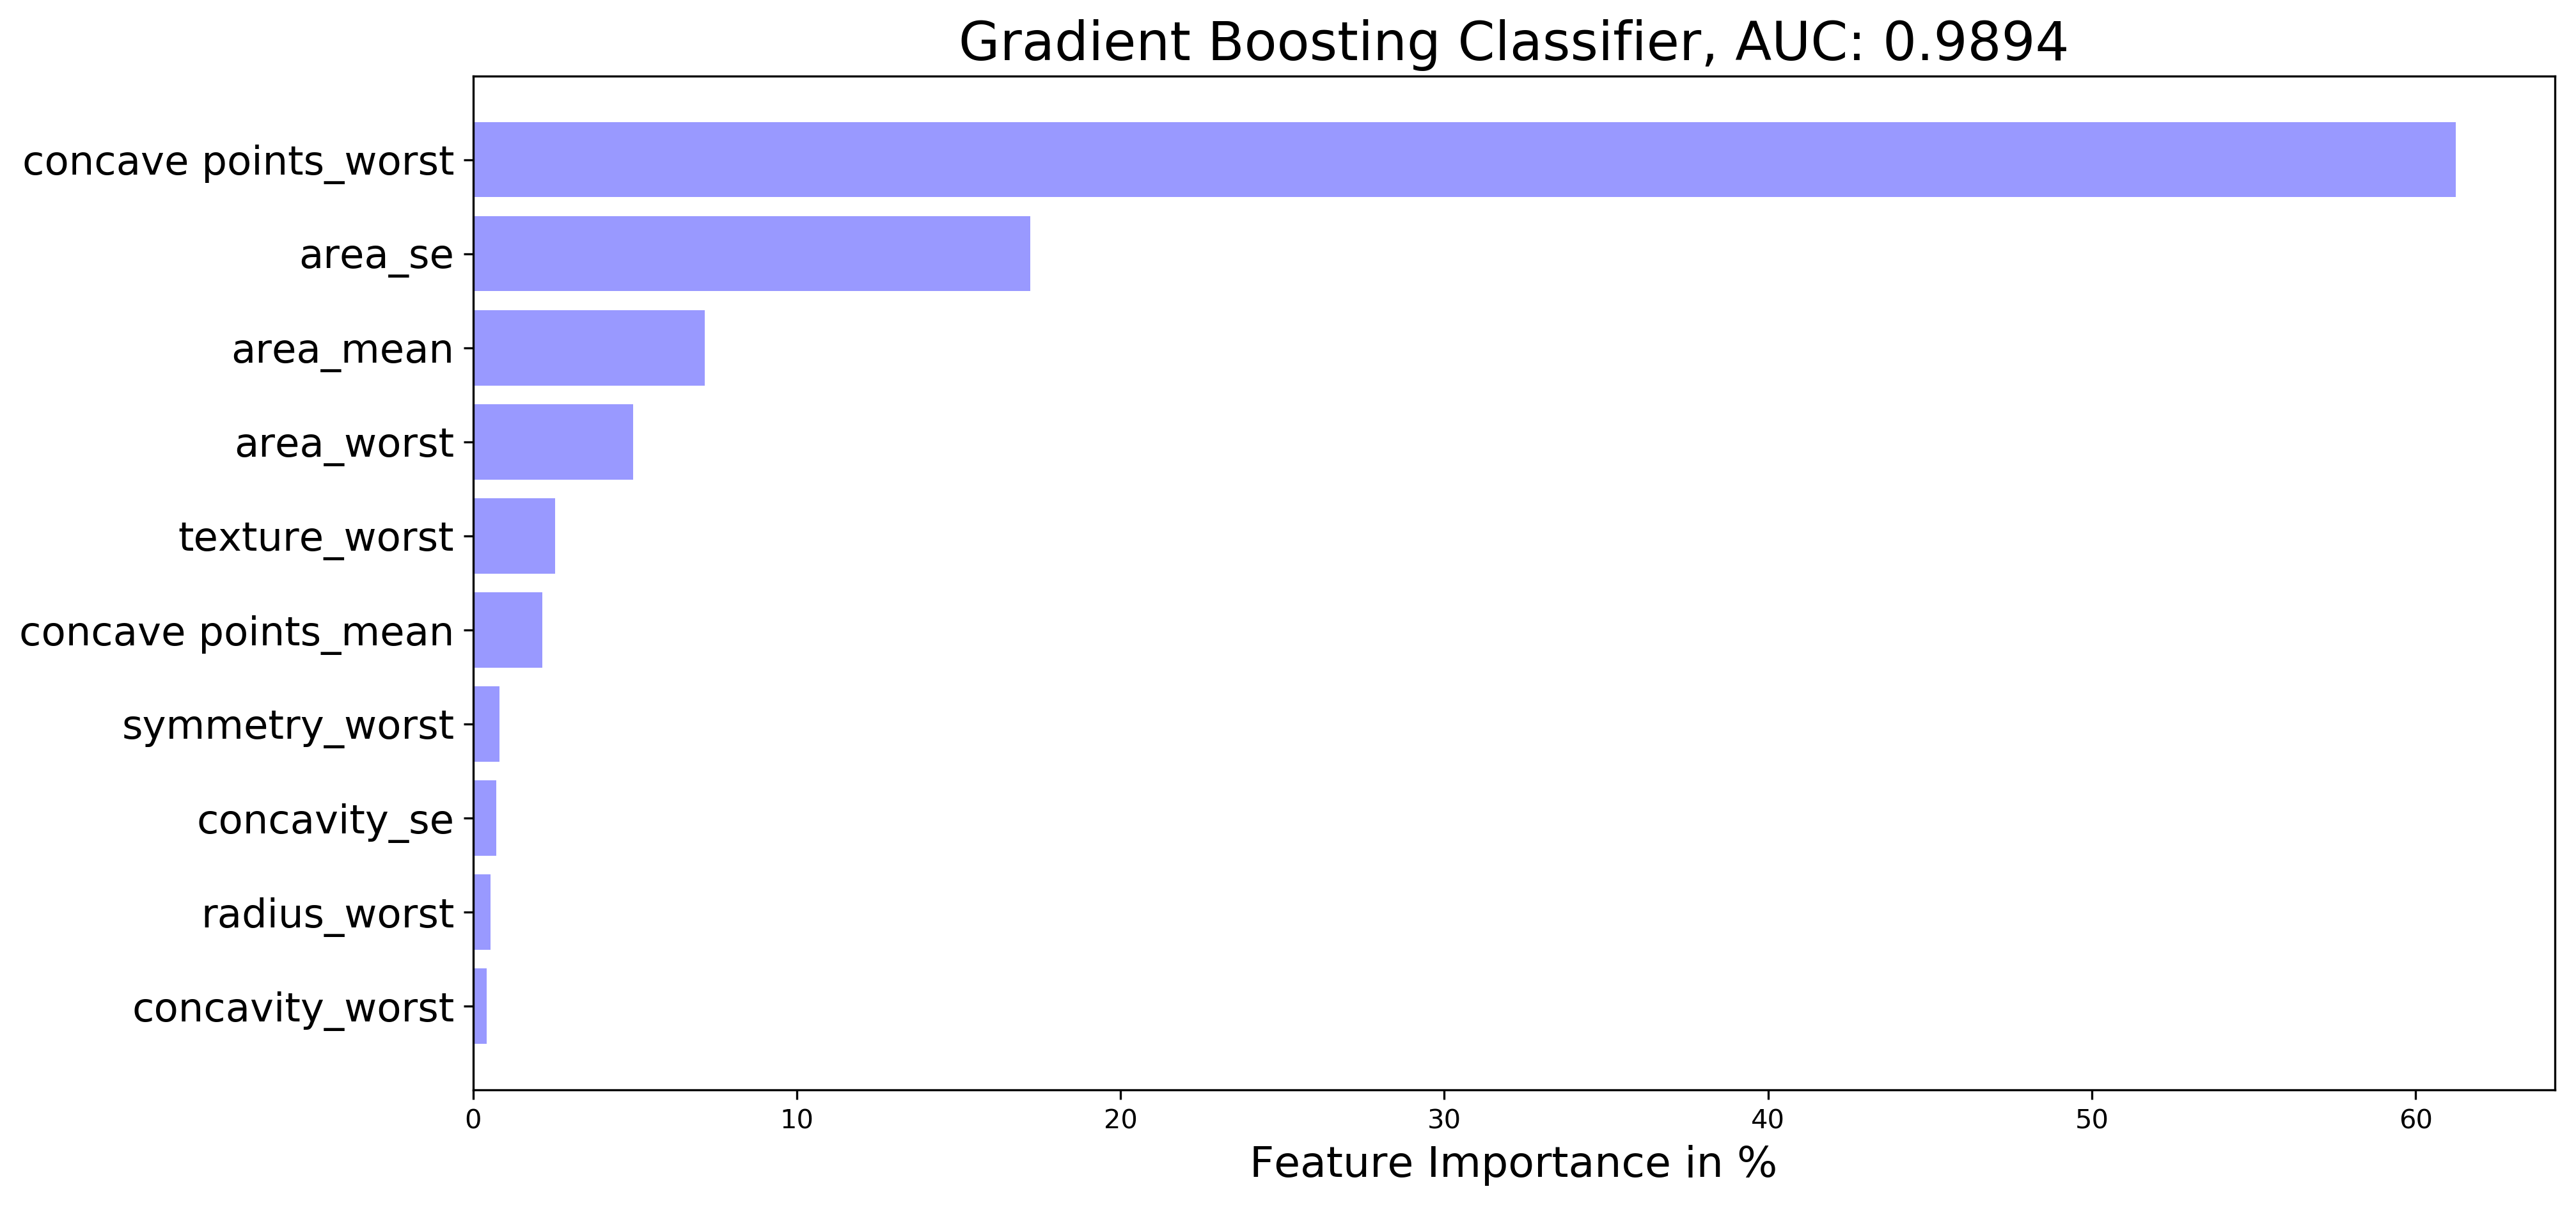

In [20]:
fig = plt.figure(figsize=(14,7), dpi=300)

plt.barh(np.arange(10), feature_importances['importance'].head(10).values[::-1], align='center', alpha=0.4, color='blue')
plt.yticks(np.arange(10), feature_importances['importance'].head(10).index[::-1], fontsize=15)
plt.title('Gradient Boosting Classifier, AUC: 0.9894',fontsize=20)
plt.xlabel('Feature Importance in %', fontsize = 16)

Text(0.5, 1.0, 'Distribution of concave points_worst')

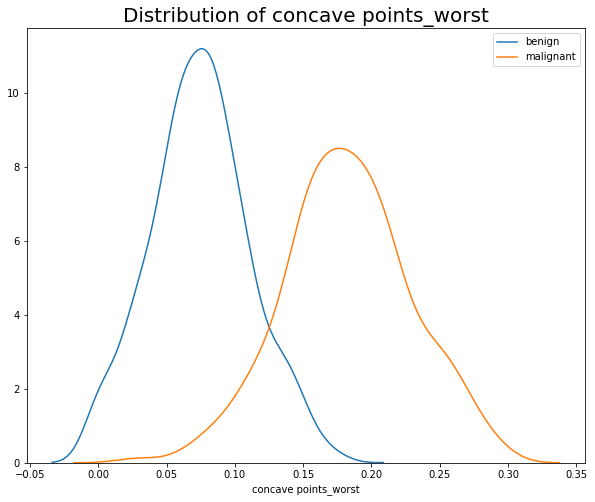

In [34]:
# Visualization: concave points_worst.
# Set the plot size
plt.figure(figsize = (10, 8))

# KDE plot of y = 0 
sns.kdeplot(data.loc[data['diagnosis'] == 0, 'concave points_worst'], label = 'benign')
    
# KDE plot of y = 0 
sns.kdeplot(data.loc[data['diagnosis'] == 1, 'concave points_worst'], label = 'malignant')

# Labeling
plt.xlabel('concave points_worst')
plt.title('Distribution of '+ 'concave points_worst', fontsize=20)

# 4. Feature Dimension Reduction
- What if I only use the top most influential features to do the prediction task? Will the model performance affected a lot? 

In [36]:
# I selected top four features to achieve 90% cumulative feature importance in total.
feature_importances.head()

,importance,cumulative_sum (%)
concave points_worst,61.23,61.23
area_se,17.21,78.44
area_mean,7.15,85.59
area_worst,4.94,90.53
texture_worst,2.54,93.07


In [21]:
train_standardized_data, test_standardized_data, y_train, y_test, column_names = feature_dimension_reduction(data=data)

/Users/kevin/Documents/DS_Project/Breast_Cancer/Breast_Cancer_Functions.py:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['diagnosis'] = le.transform(data['diagnosis'])


In [23]:
best_gb_clf.fit(train_standardized_data, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5573223602679283, loss='deviance',
              max_depth=1.210178297036005,
              max_features=0.34622300182713517, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=340,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.9872776216269418, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
# Make predictions on training and testing set.
gb_train_pred = best_gb_clf.predict(train_standardized_data)
gb_test_pred = best_gb_clf.predict(test_standardized_data)

In [25]:
test_df = pd.DataFrame(confusion_matrix(y_test, y_pred=gb_test_pred), 
                       columns=['Pred 0', 'Pred 1'],
                       index = ['True 0', 'True 1'])
test_df

,Pred 0,Pred 1
True 0,66,1
True 1,3,44


In [26]:
print(classification_report(y_true=y_test, 
                            y_pred=gb_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



           train      test
metrics                   
AUC          1.0  0.960622
Accuracy     1.0  0.964912
Precision    1.0  0.977778
Recall       1.0  0.936170
f1-score     1.0  0.956522


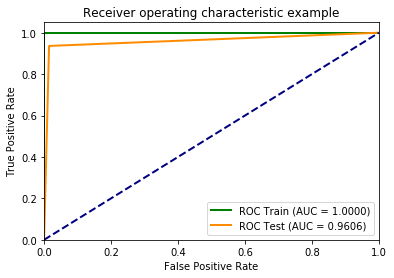

In [27]:
get_performance_metrics(y_train=y_train, 
                        y_train_pred=gb_train_pred, 
                        y_test=y_test, 
                        y_test_pred=gb_test_pred, 
                        threshold=0.5)

plot_roc_curve(y_train=y_train, 
                        y_train_pred=gb_train_pred, 
                        y_test=y_test, 
                        y_test_pred=gb_test_pred)

- Comparsion with using all features and only top 4 most influential features:

- Overall groups

| Model | Accuracy score | AUC | 
| -- | -- | -- |
| **GradientBoostingClassifier (all features)** | **0.99**  | **0.9894** |
| **GradientBoostingClassifier (top 4 features)** | 0.96 | 0.9606 | 


- benign group (on testing set)

| Model | Precision score | Recall score | F1-score
| -- | -- | -- | -- |
| **GradientBoostingClassifier** | **0.99**  | **1.0** | **0.99**
| **GradientBoostingClassifier (top 4 features)** | 0.96 | 0.99 | 0.97

- malignant group (on testing set)
 
| Model | Precision score | Recall score | F1-score
| -- | -- | -- | -- |
| **GradientBoostingClassifier** | **1.0**  | **0.98** | **0.99**
| **GradientBoostingClassifier (top 4 features)** | 0.98 | 0.94 | 0.96